# Named Entity Recognition
### Problem Statement and Datasets : https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import tensorflow as tf
np.random.seed(0)
print('tensorflow version: '+tf.__version__)

tensorflow version: 2.3.1


In [2]:
df=pd.read_csv('ner_dataset.csv',encoding='latin1')
df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [3]:
df.isnull().values.any() #true means there are missing values

True

In [26]:
df.fillna(method='ffill',inplace=True) #using forward fill method to encoutnter null values

In [27]:
df.dtypes

Sentence #    object
Word          object
POS           object
Tag           object
dtype: object

In [28]:
df.columns

Index(['Sentence #', 'Word', 'POS', 'Tag'], dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Sentence #  1048575 non-null  object
 1   Word        1048575 non-null  object
 2   POS         1048575 non-null  object
 3   Tag         1048575 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


In [30]:
df.Word.nunique()

35178

In [31]:
df.Tag.nunique()

17

In [32]:
words_class=list(df.Word.unique())
len(words_class)

35178

In [33]:
tags_class=list(df.Tag.unique())
len(tags_class)

17

### Retrieving Sentences and corresponding Tags

In [34]:
class sentence(object):
    def __init__(self, df):
        self.n_sent = 1
        self.df = df
        self.empty = False
        agg = lambda s : [(w, p, t) for w, p, t in zip(s['Word'].values.tolist(),
                                                       s['POS'].values.tolist(),
                                                       s['Tag'].values.tolist())]
        self.grouped = self.df.groupby("Sentence #").apply(agg)
        self.sentences = [s for s in self.grouped]

In [36]:
getter = sentence(df)
sentences = getter.sentences

In [37]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

(array([1.300e+01, 1.800e+02, 7.030e+02, 1.363e+03, 2.152e+03, 2.803e+03,
        3.496e+03, 3.965e+03, 4.559e+03, 4.849e+03, 4.706e+03, 4.447e+03,
        3.814e+03, 3.117e+03, 2.433e+03, 1.699e+03, 1.767e+03, 6.490e+02,
        4.720e+02, 2.660e+02, 1.710e+02, 1.050e+02, 7.300e+01, 5.900e+01,
        2.400e+01, 1.800e+01, 2.100e+01, 6.000e+00, 9.000e+00, 6.000e+00,
        2.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,   3.06,   5.12,   7.18,   9.24,  11.3 ,  13.36,  15.42,
         17.48,  19.54,  21.6 ,  23.66,  25.72,  27.78,  29.84,  31.9 ,
         33.96,  36.02,  38.08,  40.14,  42.2 ,  44.26,  46.32,  48.38,
         50.44,  52.5 ,  54.56,  56.62,  58.68,  60.74,  62.8 ,  64.86,
         66.92,  68.98,  71.04,  73.1 ,  75.16,  77.22,  79.28,  81.34,
         83.4 , 

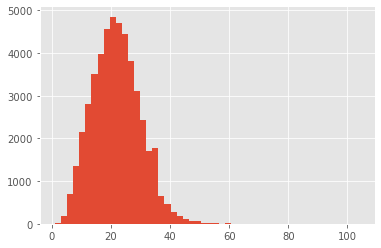

In [39]:
plt.hist([len(s) for s in sentences],bins=50)

In [40]:
word2idx={w: i+1 for i, w in enumerate(words_class)}
tag2idx={t:i for i,t in enumerate(tags_class)}

In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

max_len=50

X=[[word2idx[w[0]] for w in s] for s in sentences]

In [43]:
X=pad_sequences(maxlen=max_len,sequences=X,padding='post', value=len(words_class))

Y=[[tag2idx[w[2]] for w in s] for s in sentences]
Y=pad_sequences(maxlen=max_len,sequences=Y,padding='post', value=tag2idx['O'])
Y=[to_categorical(i,num_classes=len(tags_class)) for i in Y]

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=1)

## Building and Training Bidirectional LSTM model 

In [64]:
from tensorflow.keras import Model,Input
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [65]:
input_word=Input(shape=(max_len,))
model=Embedding(input_dim=len(words_class)+1,output_dim=max_len,input_length=max_len)(input_word)
model=SpatialDropout1D(0.1)(model)
model=Bidirectional(LSTM(units=100,return_sequences=True,recurrent_dropout=0.1))(model)
out=TimeDistributed(Dense(len(tags_class),activation='softmax'))(model)
model=Model(input_word,out)
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 50, 50)            1758950   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 50, 50)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 200)           120800    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 50, 17)            3417      
Total params: 1,883,167
Trainable params: 1,883,167
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [67]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.inputs.tf_keras import PlotLossesCallback

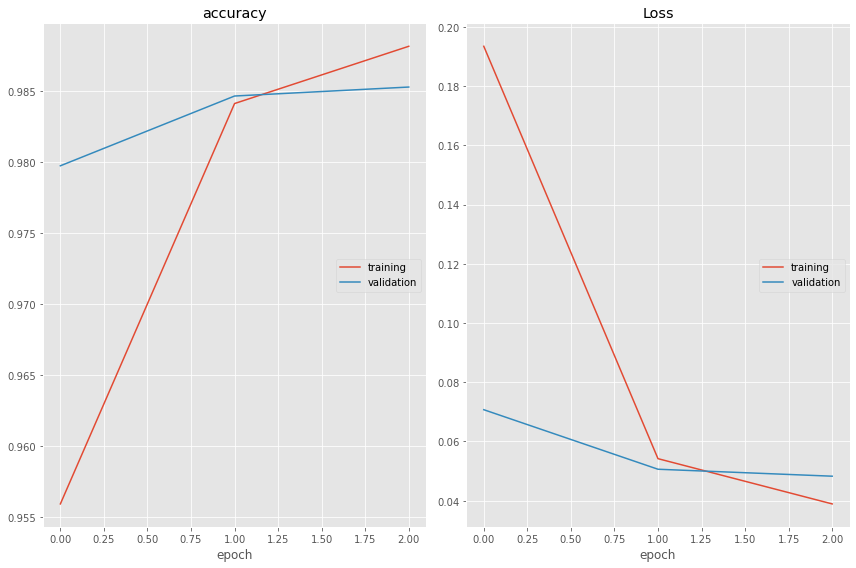

accuracy
	training         	 (min:    0.956, max:    0.988, cur:    0.988)
	validation       	 (min:    0.980, max:    0.985, cur:    0.985)
Loss
	training         	 (min:    0.039, max:    0.193, cur:    0.039)
	validation       	 (min:    0.048, max:    0.071, cur:    0.048)
1080/1080 [==============================] - 222s 206ms/step - loss: 0.0389 - accuracy: 0.9882 - val_loss: 0.0483 - val_accuracy: 0.9853


In [68]:
early_stopping=EarlyStopping(monitor='val_accuracy',patience=1,verbose=0,mode='max',restore_best_weights=False)
callbacks=[PlotLossesCallback(),early_stopping]

history=model.fit(X_train,np.array(Y_train),validation_split=0.2,batch_size=32,epochs=3,verbose=1,callbacks=callbacks)

In [69]:
model.evaluate(X_test,np.array(Y_test))

150/150 [==============================] - 4s 28ms/step - loss: 0.0506 - accuracy: 0.9848


[0.05055651441216469, 0.9848039746284485]

In [70]:
i=np.random.randint(0,X_test.shape[0])

p=model.predict(np.array([X_test[i]]))
p=np.argmax(p,axis=-1)
y_true=np.argmax(np.array(Y_test),axis=-1)[i]

p

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int64)

In [71]:
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)